In [0]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [0]:
sns.set(style="white", color_codes=True)

warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
dataset = pd.read_csv('drive/My Drive/Colab Notebooks/CC.csv') #Reading the data and replacting the null values with mean
dataset.isna().sum()
dataset.fillna(dataset.mean(),inplace=True)
dataset.isna().sum()



CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [0]:
X = dataset.iloc[:,1:]

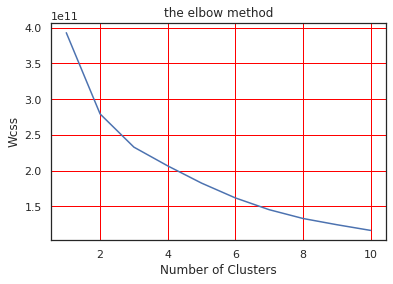

In [8]:
wcss=[]
for i in range(1,11):                                                                           #Plotting the elbow graph for k value
    kmeans= KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.grid(b=True, which='major', color='RED', linestyle='-')
plt.show()

In [9]:
 # K value is 3
 ##building the model
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(score)

0.4654251280958053


In [0]:
#Applying Standardization and PCA
scaler = StandardScaler()
scaler.fit(X)
x_scaler=scaler.transform(X)
pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)

#From elbow method choose clusters as 3
km = KMeans(n_clusters=3)
km.fit(x_pca)
y_cluster_kmeans= km.predict(x_pca)

#Calculating silhouette score
score = metrics.silhouette_score(x_pca, y_cluster_kmeans)

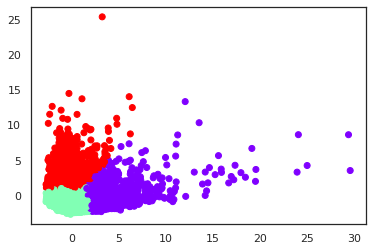

In [17]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_cluster_kmeans,cmap='rainbow')
plt.show()